In this notebook, we're going to see how to load machine learning datasets and visualize some dimensions of it. Visual inspection of a dataset is a powerful tool in the toolbox of any machine learning engineer. Whenever you're presented a dataset make sure you can visualize some parts of the dataset. In this notebook, we're first going to look at a random datset, then we are going to use `sklearn` to load the famous iris dataset and look at the distribution. 

In [6]:
# Necessary imports 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [7]:
# Let's generate some random data. 
np.random.seed(912)
def random_data(num_samples):
    """
    Generates random data in two dimensions. 
    Returns a (num_samples, 2) numpy array. 
    """
    mean, cov = [0.5,0.5], [[1,0],[0,100]]
    X = np.random.multivariate_normal(mean, cov, size=num_samples)
    return X 

Lets test if we actually can get some data. We're going to start slow and draw 50 samples from our function. 

In [8]:
rand_data = random_data(50)
print(rand_data)
print("Data generated of shape:{}".format(rand_data.shape))

[[  2.38844992  -1.63950263]
 [  0.75605384  -6.22371025]
 [  0.63425466 -10.76118142]
 [  0.69506623 -11.85747388]
 [  1.4661755   -1.59446729]
 [ -0.62393265 -13.85770098]
 [  1.62546485 -19.3475291 ]
 [  0.84441938 -11.51257881]
 [  0.58695958   3.81889117]
 [  0.18471083   4.21149859]
 [ -0.34133745  17.16222984]
 [  1.17245178 -16.10105392]
 [ -0.20831197  -8.12361548]
 [  1.65301519  10.24355616]
 [ -0.7264035   -1.56433337]
 [  0.55543475   5.40763484]
 [  0.79927505   7.61554737]
 [ -0.04826969  12.51505776]
 [  1.25228296  -4.23389556]
 [  0.72094623  -5.96626395]
 [  0.44535496  -0.24928131]
 [ -0.30041991   0.8397796 ]
 [ -0.19816191  -8.85715815]
 [ -0.41777507   7.58831987]
 [ -0.51505484  -9.34385444]
 [  1.11251338  16.97635784]
 [  0.46186661 -12.42881378]
 [ -0.93865738  -9.81859131]
 [  0.67197315   2.75447372]
 [  2.05170888  14.12672741]
 [  1.04201463   1.74698215]
 [ -0.30276545  -0.64047042]
 [  0.28229565   3.54920444]
 [  0.957881     1.35736715]
 [ -1.34631445

Awesome! So now we have some data to play with. Let's try to generate some more samples and then plot it. We're going to see two ways of plotting a data generated like this. 

In [9]:
X = random_data(1000)
Y = np.linspace(0,1, num=1000) # This generates 1000 samples between 0 and 1. 

The above two commands set up the X and the Y axis. Machine Learning is all about the dimensionality of the data. So if a data is 2 dimensional it means that the data has two variables that are influencing the outcomes. We chose Y to be between 0 and 1 since we drew our samples from a multivariate distribution. Let us now plot them using `matplotlib`.

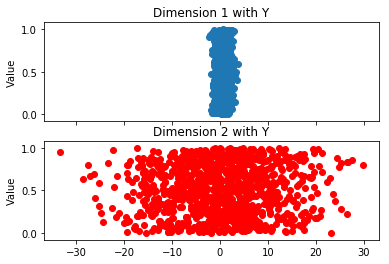

In [10]:
_, (ax1,ax2) = plt.subplots(2, sharex=True)
ax1.scatter(X[:, 0], Y)
ax1.set_title("Dimension 1 with Y")
ax1.set_ylabel("Value")

ax2.scatter(X[:, 1],Y, c='r')
ax2.set_title("Dimension 2 with Y")
ax2.set_ylabel("Value")

plt.show()


Here we can see how different the two dimensions are. The first dimension is centered on `0` and spreads out _very little_. The second dimension is also centered on `0` but has a large spread area. As we move further in this course, we shall see why these two affect our models differently. But for now, we have a lot of code repetition if we wanted to customize the number of samples. Let's organize this plotting script into a neat function that we can control according to our whims. 

In [11]:
# a function to generate and plot data. 

def gen_vis_data(num_samples, colors=['b','r']):
    """
    Generates num_samples random data from a distribution and 
    plots it in two separate plots as visualization. 
    
    Args:
    num_samples: Number of samples to be generated. 
    colors(Optional):The colors for the different plots.
    """
    data = random_data(num_samples)
    Y = np.linspace(0, 1, num=num_samples)
    _, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.scatter(data[:, 0], Y, c=colors[0])
    ax1.set_title("Dimension 1 with Y")
    ax1.set_ylabel("Value")

    ax2.scatter(data[:, 1],Y, c=colors[1])
    ax2.set_title("Dimension 2 with Y")
    ax2.set_ylabel("Value")

    plt.show() 
    

Let's test our newly built function by generating random samples of different sizes. Whenever you write something new, it's always a good idea to test it first on small data. 

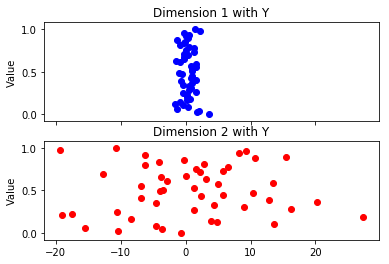

In [12]:
gen_vis_data(50)

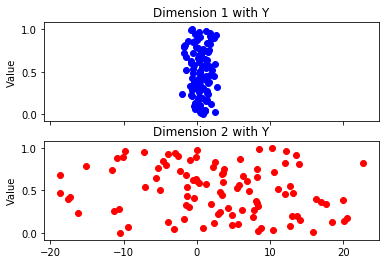

In [13]:
gen_vis_data(100)

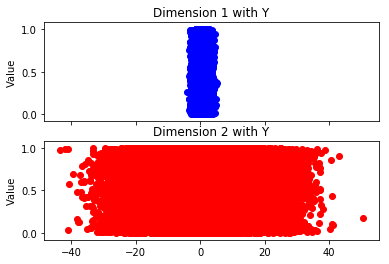

In [14]:
gen_vis_data(100000)

You can see how closely packed the plots become as the number of samples increases. This is one of the main reasons why we want to have as much training data as possible. The more closer certain samples are, the more easier it is for algorithms to process them. In the plots you can see some points lying outside the spread. These are called _outliers_.

Next, we shall see another better technique of visualization of data using a new python library called `seaborn`. This is a library that provides sensible defaults for plotting various plots. In this we're going to use a function called `jointplot`.

             x          y
0     1.519632   3.009545
1    -1.318806   7.512792
2     0.208996 -12.441298
3     0.835332  -3.227731
4    -0.965293 -14.216423
5    -0.625529   2.794678
6     0.451201  -5.850635
7     0.353174   2.228217
8     0.564646 -12.926937
9     2.202075 -19.280068
10   -0.046663   8.435433
11    0.593380   2.965725
12    0.555949 -19.214011
13    2.486605  15.579957
14   -0.381026  10.890019
15   -2.126726   1.760457
16   -0.028778   3.214339
17    1.697250  -0.606710
18   -0.396885  12.476661
19    2.935658 -13.672730
20    2.823455   2.338162
21   -1.156416   6.109969
22   -0.645261   0.389387
23    1.042975  -4.937858
24   -0.056456  11.924971
25    0.337777   6.765635
26    1.108443  13.840846
27    1.342993   9.990433
28    1.254595   2.025848
29    0.778603 -13.520779
...        ...        ...
9970  0.989654  18.031640
9971  0.151132 -14.156608
9972  2.857660  -1.780550
9973  1.758559  -7.325217
9974  0.071860   5.777569
9975 -0.961007   9.733023
9976  1.0967

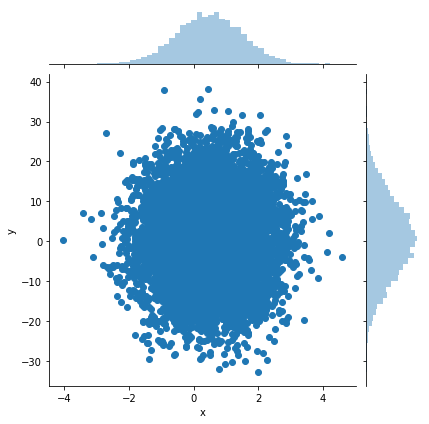

In [15]:
# generate random data plot it using seaborn 
data = random_data(10000)
dframe = pd.DataFrame(data, columns=["x","y"])
print(dframe)
jplot = sns.jointplot(x="x",y="y", data=dframe)
plt.show()

This looks cool! What this really does is collapse the two plots we saw above into one. We introduced another thing called `DataFrame`. This is a way to structure your data as tables. The `x` of this DataFrame are the samples in the first dimension and the `y` is the samples in the second. We can name the columns according to our wish. Let's make the above plot a little more meaningful.

         dim_1      dim_2
0    -1.011079 -16.081917
1     0.452497  -6.498838
2    -1.100139  17.133457
3     1.877969  -0.621327
4     1.129271  -1.354917
5     1.785417  -1.819331
6    -1.001768  -0.620027
7    -0.677472   1.105944
8    -1.767712   2.449950
9     0.382155   1.127789
10    0.826112  -8.600354
11   -0.767366   5.677084
12   -1.701190  -9.408450
13    1.762225  17.043777
14    1.447773  -3.420029
15   -1.225832 -10.159404
16   -1.545715  -3.322513
17    2.645702   1.684604
18    0.149785  12.328063
19    0.694925  -4.370038
20   -0.664531   3.417279
21    2.118259  14.733020
22   -1.016316  13.959039
23    0.526575  -0.673707
24   -0.765489 -20.738651
25    0.712487  -2.328090
26    0.871082  11.708985
27    1.331501   1.335488
28    1.756950  14.277339
29    1.701151  15.373009
...        ...        ...
9970 -0.291586  11.043903
9971  1.703726   7.080267
9972  1.344202   7.829371
9973 -0.345549   5.787498
9974  0.712807 -19.928824
9975  1.281166  -6.324353
9976 -0.1411

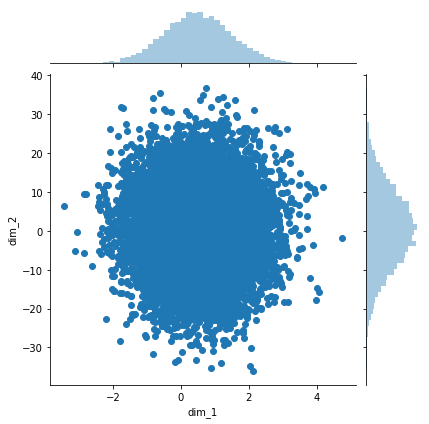

In [16]:
data = random_data(10000)
dframe = pd.DataFrame(data, columns=["dim_1","dim_2"])
print(dframe)
jplot = sns.jointplot(x="dim_1",y="dim_2", data=dframe)
plt.show()

This looks a lot better than before. Now, we have seen how to generate and visualize random data. We shall now turn to `sklearn` and plot the famous IRIS dataset with our newly acquired skills. We're going to import dataset and look at the first 100 samples of the data. In addition, we're going to look at `targets` which tell a machine learning algorithm the "correct answer" for a particular data. 

In [17]:
from sklearn import datasets

In [18]:
iris = datasets.load_iris()
print("Iris Data shape:{}".format(iris.data.shape))
print("Iris Target shape:{}".format(iris.target.shape))

Iris Data shape:(150, 4)
Iris Target shape:(150,)


The "shape" of the dataset indicates two things. The first number i.e. `150` tells you there are 150 samples in this dataset. The next number `4` tells you that there are four _dimensions_ to this data. In real life machine learning algorithms a dataset can have _thousands_ of dimensions. Using the tools we developed here, it's always possible to view the first 2 or 3 dimensions to see how the data samples look like. 

Now, let's load a slice of this data and see what it looks like. As before we'll write a very tailor made version and get it to work before writing a neat utility. 

Target names:['setosa' 'versicolor' 'virginica']


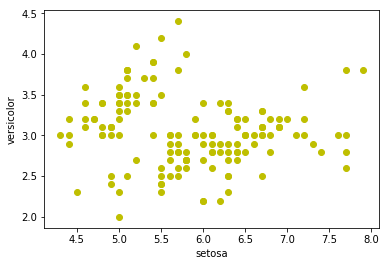

In [22]:
iris = datasets.load_iris()
iris_reduced = iris.data[:, :2] # let's only look at first two dimensions. 
target = iris.target 
print("Target names:{}".format(iris.target_names))

# visualization starts here 
xmax, xmin = iris_reduced[:,0].max()-0.5, iris_reduced[:, 0].min()-0.5
ymax, ymin = iris_reduced[:,1].max()-0.5, iris_reduced[:, 1].min()-0.5

plt.scatter(iris_reduced[:, 0], iris_reduced[:,1], c='y')
plt.xlabel("setosa")
plt.ylabel("versicolor")
plt.show()

As you can see this data has far more spread than the randomly generated samples we were seeing before. In reality most machine learning data is like this and plots help to understand better what algorithm to choose. In the above plot for example if you draw a `y=mx+c` line you'd be able to see that some samples fall over that line and some under it. A dataset like this is called _linearly separable_ since a line can divide the data into two distinct halves.

As an excercise, you must load the 3rd dimension and plot the result using the script above. The third dimension is simply `data[:, 2]`. Write your code in the cell provided below and then hit `shift+enter` to see the result. 

In [23]:
iris = datasets.load_iris()
target = iris.target 

# your code here. 
